<a href="https://colab.research.google.com/github/PrahasHegde/Nobel_prize_winners_Analysis/blob/main/Nobel_prize_winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset from Kaggle

In [23]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("sazidthe1/nobel-prize-data")

print("Path to dataset files:", path)
print("Dataset files:", os.listdir(path))

Path to dataset files: /kaggle/input/nobel-prize-data
Dataset files: ['nobel_laureates_data.csv']


In [24]:
df = pd.read_csv(os.path.join(path, "nobel_laureates_data.csv"))
df.head(10)

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY
5,2023,chemistry,for the discovery and synthesis of quantum dots,3,1030,Louis Brus,male,1943-00-00,USA,Cleveland OH,0000-00-00,NaN,NaN,Columbia University,USA,New York NY
6,2023,chemistry,for the discovery and synthesis of quantum dots,3,1029,Moungi Bawendi,male,1961-00-00,France,Paris,0000-00-00,NaN,NaN,Massachusetts Institute of Technology (MIT),USA,Cambridge MA
7,2023,physics,for experimental methods that generate attosec...,3,1028,Anne L Huillier,female,16-08-1958,France,Paris,0000-00-00,NaN,NaN,Lund University,Sweden,Lund
8,2023,physics,for experimental methods that generate attosec...,3,1027,Ferenc Krausz,male,17-05-1962,Hungary,Mor,0000-00-00,NaN,NaN,Max Planck Institute of Quantum Optics,Germany,Garching
9,2023,physics,for experimental methods that generate attosec...,3,1026,Pierre Agostini,male,23-07-1941,Tunisia,Tunis,0000-00-00,NaN,NaN,The Ohio State University,USA,Columbus OH


In [25]:
df.shape

(1000, 16)

In [26]:
df.dtypes

,0
year,int64
category,object
motivation,object
prizeShare,int64
laureateID,int64
fullName,object
gender,object
born,object
bornCountry,object
bornCity,object


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 1000 non-null   int64 
 1   category             1000 non-null   object
 2   motivation           1000 non-null   object
 3   prizeShare           1000 non-null   int64 
 4   laureateID           1000 non-null   int64 
 5   fullName             1000 non-null   object
 6   gender               1000 non-null   object
 7   born                 1000 non-null   object
 8   bornCountry          970 non-null    object
 9   bornCity             966 non-null    object
 10  died                 970 non-null    object
 11  diedCountry          652 non-null    object
 12  diedCity             646 non-null    object
 13  organizationName     736 non-null    object
 14  organizationCountry  733 non-null    object
 15  organizationCity     731 non-null    object
dtypes: int6

In [28]:
df.describe()

,year,prizeShare,laureateID
count,1000.000000,1000.000000,1000.000000
mean,1973.721000,2.027000,509.099000
std,34.523195,0.944014,298.130617
min,1901.000000,1.000000,1.000000
25%,1949.750000,1.000000,250.750000
50%,1979.000000,2.000000,500.500000
75%,2003.000000,3.000000,764.250000
max,2023.000000,4.000000,1034.000000


## checking for Null values

In [29]:
df.isnull().sum()

,0
year,0
category,0
motivation,0
prizeShare,0
laureateID,0
fullName,0
gender,0
born,0
bornCountry,30
bornCity,34


## Handling missing values

In [30]:
df['bornCountry'] = df['bornCountry'].fillna('Unknown')
df['bornCity'] = df['bornCity'].fillna('Unknown')
df['diedCity'] = df['diedCity'].fillna('Unknown')
df['diedCountry'] = df['diedCountry'].fillna('Unknown')
df['organizationCountry'] = df['organizationCountry'].fillna('Unknown')
df['organizationCity'] = df['organizationCity'].fillna('Unknown')
df['organizationName'] = df['organizationName'].fillna('Unknown')
df['died'] = df['died'].fillna('Unknown')

print(df.shape)
df.isnull().sum()

(1000, 16)


,0
year,0
category,0
motivation,0
prizeShare,0
laureateID,0
fullName,0
gender,0
born,0
bornCountry,0
bornCity,0


# Exploratory Data Analysis (EDA)

##  Number of Nobel Prizes per Category

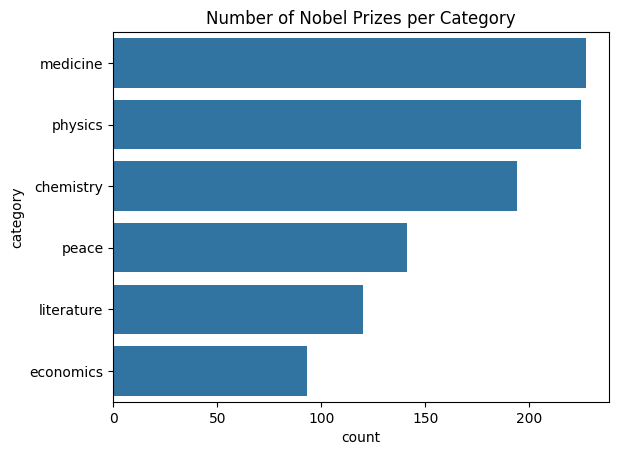

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title("Number of Nobel Prizes per Category")
plt.show()


## Gender Distribution over Time

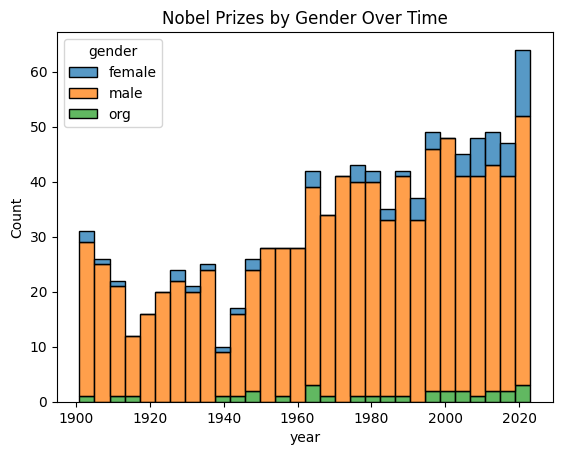

In [32]:
sns.histplot(data=df, x='year', hue='gender', multiple='stack', bins=30)
plt.title("Nobel Prizes by Gender Over Time")
plt.show()


## Top 10 countries by Birthplace

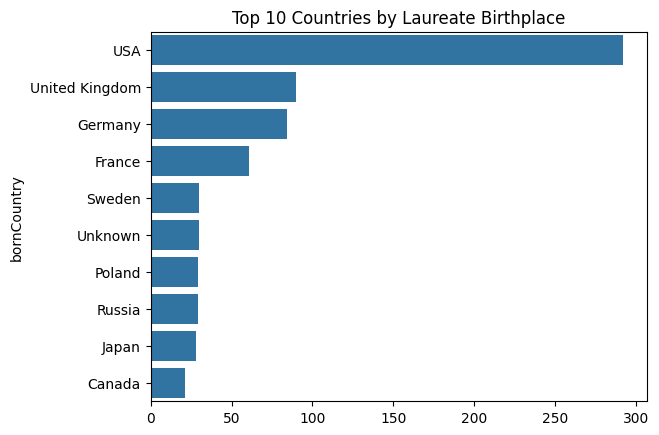

In [33]:
top_countries = df['bornCountry'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Laureate Birthplace")
plt.show()


## Gender distribution of winner categories

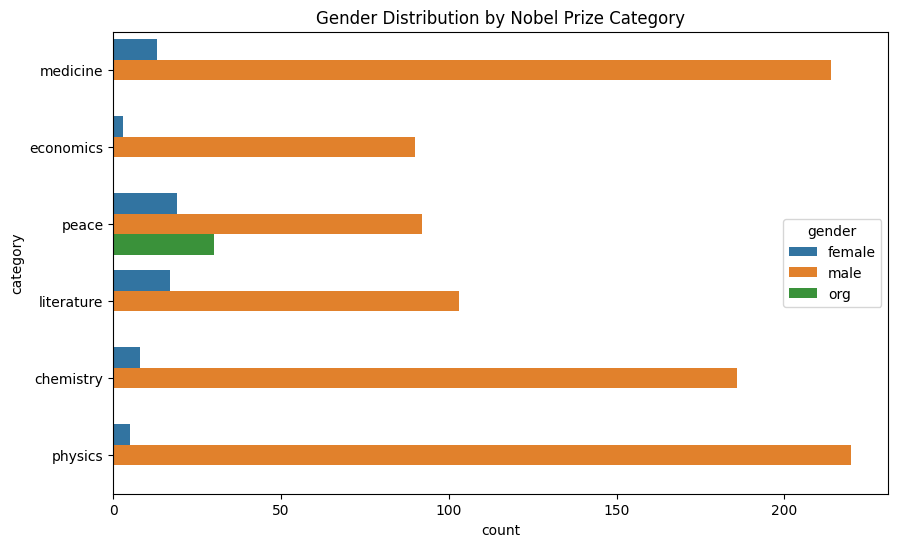

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', hue='gender')
plt.title("Gender Distribution by Nobel Prize Category")
plt.show()


## Percentage of Female Nobel Laureates Over Time

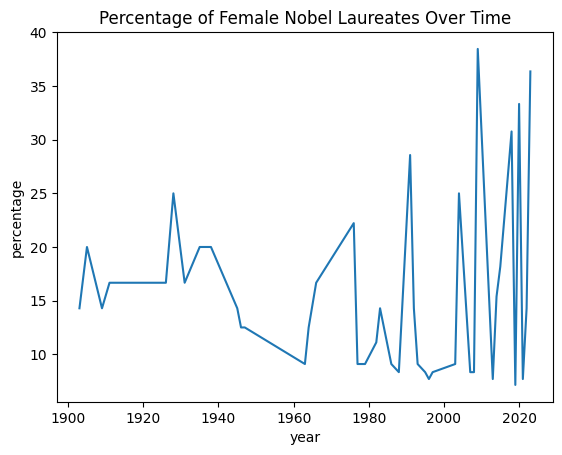

In [36]:
gender_year = df.groupby(['year', 'gender']).size().reset_index(name='count')
total_year = df.groupby('year').size().reset_index(name='total')
gender_year = gender_year.merge(total_year, on='year')
gender_year['percentage'] = (gender_year['count'] / gender_year['total']) * 100

sns.lineplot(data=gender_year[gender_year['gender'] == 'female'], x='year', y='percentage')
plt.title("Percentage of Female Nobel Laureates Over Time")
plt.show()


## Top 10 Organizations with Most Nobel Laureates

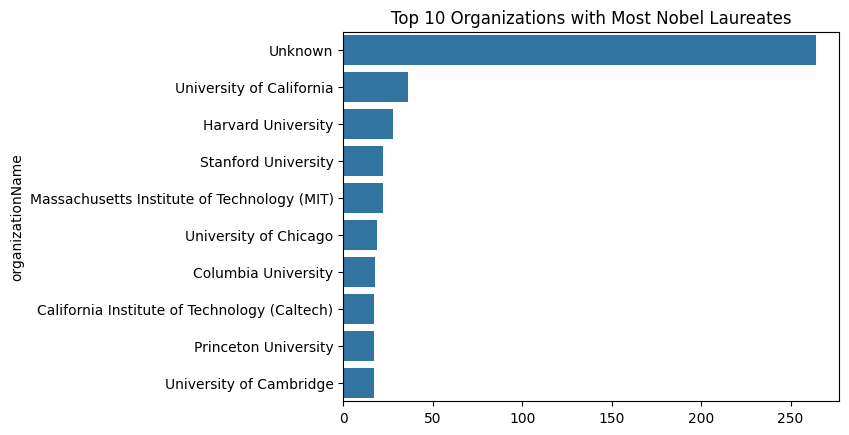

In [37]:
top_orgs = df['organizationName'].value_counts().head(10)
sns.barplot(x=top_orgs.values, y=top_orgs.index)
plt.title("Top 10 Organizations with Most Nobel Laureates")
plt.show()


## Birth Country vs Organization Country Heatmap

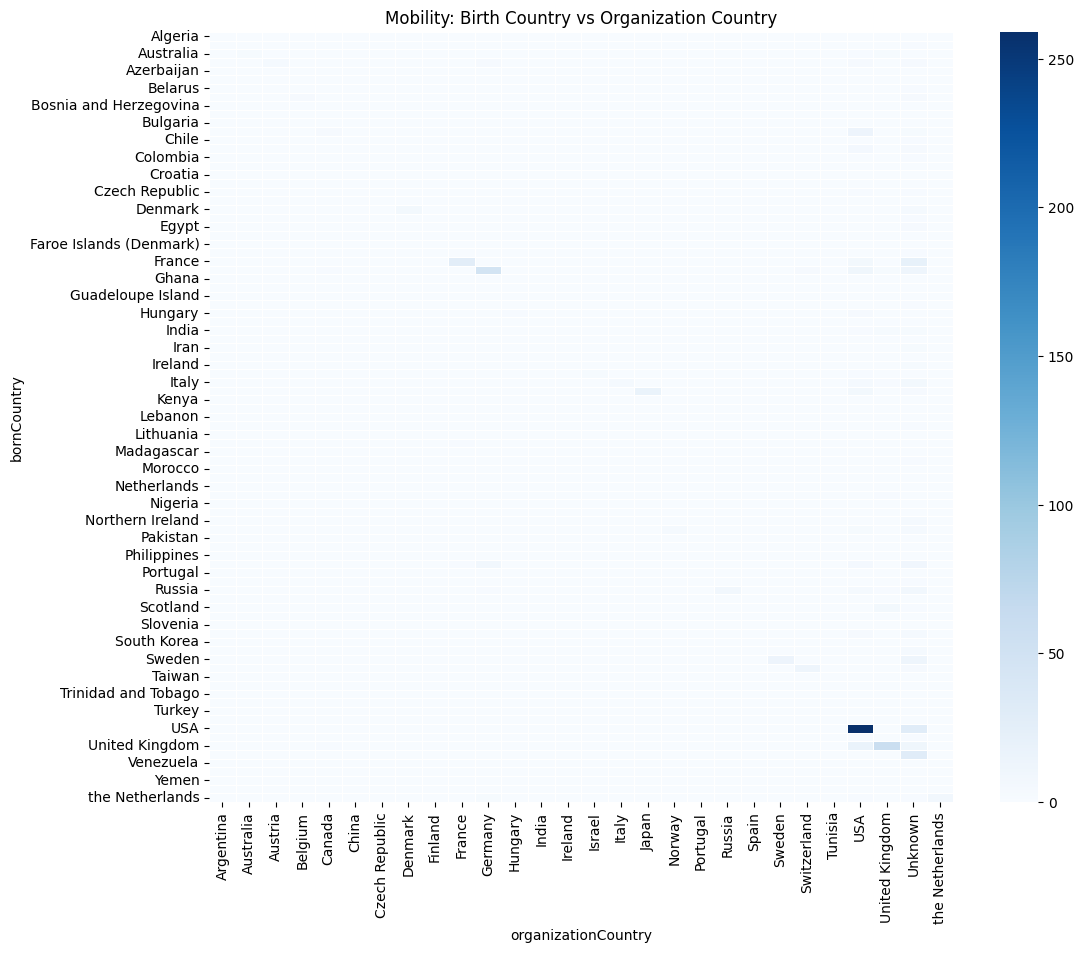

In [40]:
mobility = df.groupby(['bornCountry', 'organizationCountry']).size().reset_index(name='count')
mobility_pivot = mobility.pivot(index='bornCountry', columns='organizationCountry', values='count').fillna(0)

plt.figure(figsize=(12,10))
sns.heatmap(mobility_pivot, cmap='Blues', linewidths=0.5)
plt.title("Mobility: Birth Country vs Organization Country")
plt.show()

## Prize Share Among Laureates

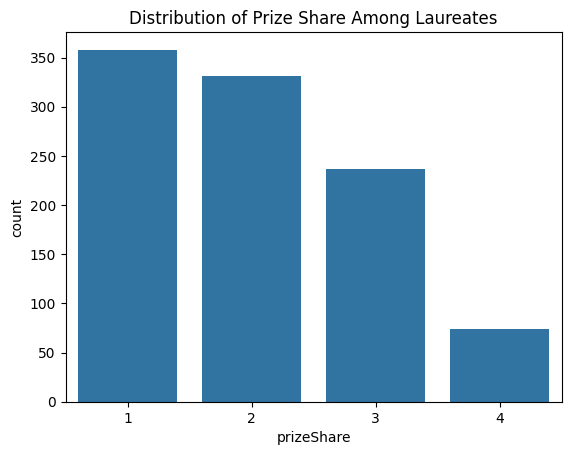

In [41]:
sns.countplot(data=df, x='prizeShare', order=sorted(df['prizeShare'].unique()))
plt.title("Distribution of Prize Share Among Laureates")
plt.show()


##

In [47]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

data = {
    'bornCountry': ['United States of America', 'Germany', 'United Kingdom', 'France', 'Sweden', 'Japan', 'India'] * 10,
}
df = pd.DataFrame(data)

# --- Aggregate Counts ---
country_counts = df['bornCountry'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# --- Coordinates Dictionary ---
country_coords = {
    'United States of America': [37.0902, -95.7129],
    'Germany': [51.1657, 10.4515],
    'United Kingdom': [55.3781, -3.4360],
    'France': [46.2276, 2.2137],
    'Sweden': [60.1282, 18.6435],
    'Japan': [36.2048, 138.2529],
    'India': [20.5937, 78.9629]
}

# --- Folium Map ---
nobel_map = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(nobel_map)

# --- Add Circle Markers ---
for idx, row in country_counts.iterrows():
    country = row['country']
    if country in country_coords:
        lat, lon = country_coords[country]
        folium.CircleMarker(
            location=[lat, lon],
            radius=row['count'] * 0.5,
            popup=f"{country}: {row['count']} Laureates",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(marker_cluster)

# --- Display in Colab Output ---
nobel_map
